In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('heart.csv')

In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Preprocessing

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [45]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: xlabel='MaxHR', ylabel='Count'>

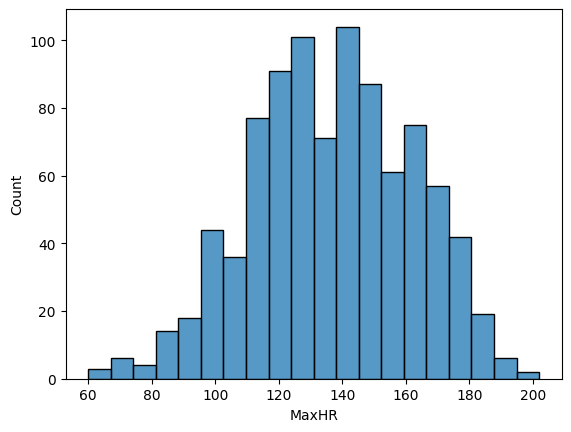

In [46]:
sns.histplot(df['MaxHR'])

In [47]:
df[df['MaxHR']>df['MaxHR'].mean()+3*df['MaxHR'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [48]:
df[df['RestingBP']>df['RestingBP'].mean()+3*df['RestingBP'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [49]:
df.shape

(918, 12)

In [50]:
df = df[df['RestingBP']<=df['RestingBP'].mean()+3*df['RestingBP'].std()]

In [51]:
df.shape

(911, 12)

In [52]:
df[df['Cholesterol']>df['Cholesterol'].mean()+3*df['Cholesterol'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [53]:
df=df[df['Cholesterol']<=df['Cholesterol'].mean()+3*df['Cholesterol'].std()]

In [54]:
df.shape

(908, 12)

In [55]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up,0
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
55,51,F,ATA,160,194,0,Normal,170,N,0.0,Up,0
689,67,F,ASY,106,223,0,Normal,142,N,0.3,Up,0
373,59,M,ASY,135,0,0,Normal,115,Y,1.0,Flat,1
206,35,M,ATA,120,308,0,LVH,180,N,0.0,Up,0
563,55,M,ASY,135,204,1,ST,126,Y,1.1,Flat,1
302,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1
691,45,M,ASY,104,208,0,LVH,148,Y,3.0,Flat,0


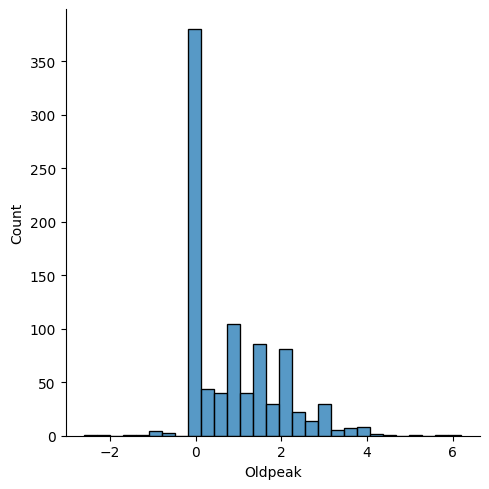

In [56]:
sns.displot(df['Oldpeak'])

In [57]:
df = df[df['Oldpeak']<=df['Oldpeak'].mean()+3*df['Oldpeak'].std()]

In [58]:
df.shape

(902, 12)

In [59]:
df['HeartDisease'].value_counts()

1    495
0    407
Name: HeartDisease, dtype: int64

In [60]:
df.corr()['HeartDisease']

C:\Users\HP\AppData\Local\Temp\ipykernel_6248\561954474.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['HeartDisease']


Age             0.285259
RestingBP       0.097560
Cholesterol    -0.242936
FastingBS       0.267567
MaxHR          -0.405855
Oldpeak         0.412480
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [61]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
225,50,M,ASY,145,264,0,Normal,150,N,0.0,Flat,1
651,61,M,ASY,140,207,0,LVH,138,Y,1.9,Up,1
767,54,F,NAP,108,267,0,LVH,167,N,0.0,Up,0
810,55,F,ATA,135,250,0,LVH,161,N,1.4,Flat,0
102,40,F,ASY,150,392,0,Normal,130,N,2.0,Flat,1
794,50,M,NAP,129,196,0,Normal,163,N,0.0,Up,0
545,48,M,ASY,132,272,0,ST,139,N,0.2,Up,0
539,57,M,ASY,110,197,0,LVH,100,N,0.0,Up,0
120,47,F,NAP,135,248,1,Normal,170,N,0.0,Flat,1
493,51,M,NAP,137,339,0,Normal,127,Y,1.7,Flat,1


<Axes: xlabel='Sex', ylabel='HeartDisease'>

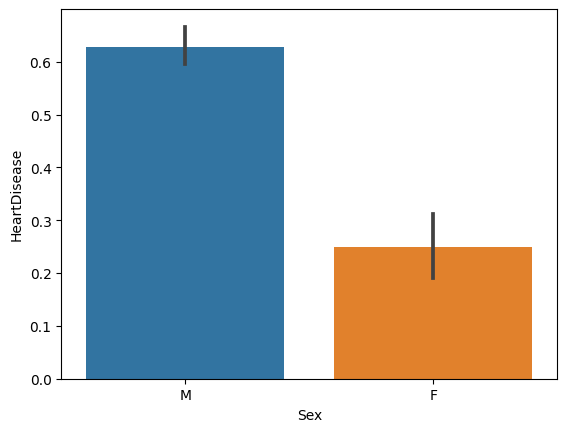

In [62]:
sns.barplot(x=df['Sex'],y=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='HeartDisease'>

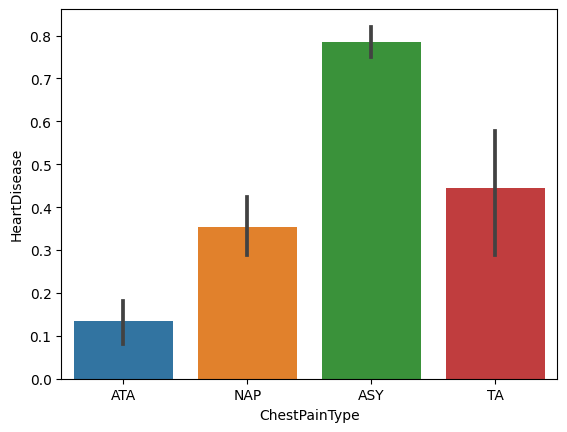

In [63]:
sns.barplot(x=df['ChestPainType'],y=df['HeartDisease'])

<Axes: xlabel='RestingECG', ylabel='HeartDisease'>

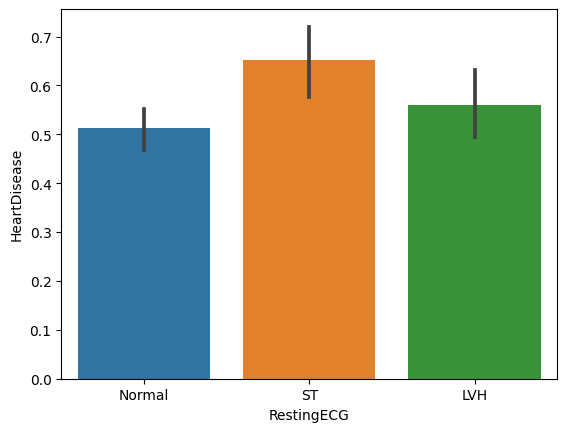

In [64]:
sns.barplot(x=df['RestingECG'],y=df['HeartDisease'])

<Axes: xlabel='ExerciseAngina', ylabel='HeartDisease'>

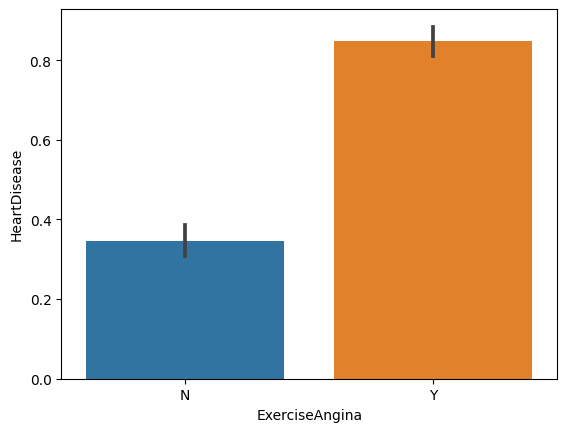

In [65]:
sns.barplot(x=df['ExerciseAngina'],y=df['HeartDisease'])

<Axes: xlabel='ST_Slope', ylabel='HeartDisease'>

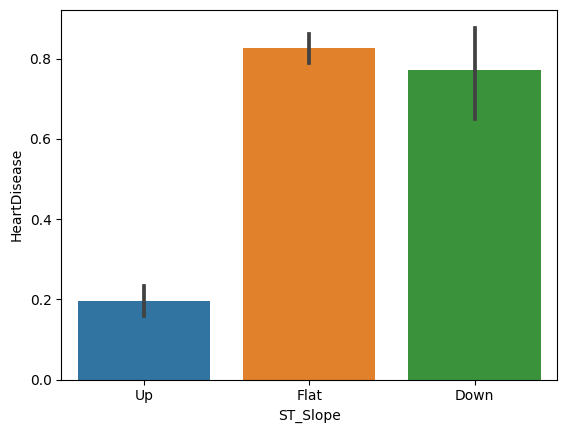

In [66]:
	
sns.barplot(x=df['ST_Slope'],y=df['HeartDisease'])

Label Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
df['Sex'] = le.fit_transform(df['Sex'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])

In [69]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [70]:
#scaling
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [72]:
x = ms.fit_transform(df.drop(columns=['HeartDisease']))
y = df['HeartDisease']

In [73]:
x[0:3]

array([[0.24489796, 1.        , 0.33333333, 0.75675676, 0.55791506,
        0.        , 0.5       , 0.78873239, 0.        , 0.39393939,
        1.        ],
       [0.42857143, 0.        , 0.66666667, 0.86486486, 0.34749035,
        0.        , 0.5       , 0.67605634, 0.        , 0.54545455,
        0.5       ],
       [0.18367347, 1.        , 0.33333333, 0.7027027 , 0.54633205,
        0.        , 1.        , 0.26760563, 0.        , 0.39393939,
        1.        ]])

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [76]:
x_train.shape

(721, 11)

In [77]:
y_test.shape

(181,)

Training Models

Using Support vector machine (Standalone)

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

svm = SVC()
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test))

score = cross_val_score(SVC(),x,y,cv=5)
print(score.mean())

0.856353591160221
0.8314303253529772


Bagging

In [90]:
from sklearn.ensemble import BaggingClassifier

baggy = BaggingClassifier(estimator=SVC(),n_estimators=100,max_samples=0.8,random_state=10)
baggy.fit(x_train,y_train)
print(baggy.score(x_test,y_test))

score = cross_val_score(baggy,x,y,cv=5)
print(score.mean())


0.856353591160221
0.8236893799877224


Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)
print(dtc.score(x_test,y_test))

score = cross_val_score(dtc,x,y,cv=5)
print(score.mean())

0.7734806629834254
0.7305340699815839


Bagging in Decision Tree

In [92]:
bag = BaggingClassifier(estimator=dtc,n_estimators=100,max_samples=0.8,oob_score=True)
score = cross_val_score(bag,x,y,cv=5)
print(score.mean())

0.8137077961939841


Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

score = cross_val_score(rfc,x,y,cv=5)
print(score.mean())

0.8336279926335175
